In [1]:
# Packages for analysis
import pandas as pd
import numpy as np
from sklearn import svm

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# Allows charts to appear in the notebook
%matplotlib inline

# Pickle package
import pickle

In [2]:
import os
os.chdir('/Users/kylecamlic/Documents')
%pwd

'/Users/kylecamlic/Documents'

In [3]:
df = pd.read_csv("statcast_2017.csv")

In [4]:
strike_zone1 = df.sample(n=500)

In [5]:
def make_meshgrid(ax, h=.02):
    # x_min, x_max = x.min() - 1, x.max() + 1
    # y_min, y_max = y.min() - 1, y.max() + 1
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


def draw_boundary(ax, clf):

    xx, yy = make_meshgrid(ax)
    return plot_contours(ax, clf, xx, yy,cmap=plt.cm.coolwarm, alpha=0.5)

In [6]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

def plot_SVM(gamma=1, C=1):
    strike_zone = strike_zone1
    #print(aaron_judge.columns)
    #print(aaron_judge.description.unique())
    #print(aaron_judge.type.unique())
    strike_zone.type = strike_zone.type.map({'S':1, 'B':0})
    #print(aaron_judge.type)
    #print(aaron_judge['plate_x'])
    strike_zone = strike_zone.dropna(subset = ['type', 'plate_x', 'plate_z'])
    fig, ax = plt.subplots()
    plt.scatter(strike_zone.plate_x, strike_zone.plate_z, c = strike_zone.type, cmap = plt.cm.coolwarm, alpha=0.6)
    training_set, validation_set = train_test_split(strike_zone, random_state=1)
    classifier = SVC(kernel='rbf', gamma = gamma, C = C)
    classifier.fit(training_set[['plate_x', 'plate_z']], training_set['type'])
    draw_boundary(ax, classifier)
    plt.show()
    print("The score of SVM with gamma={0} and C={1} is:".format(gamma, C) )
    print(classifier.score(validation_set[['plate_x', 'plate_z']], validation_set['type']))

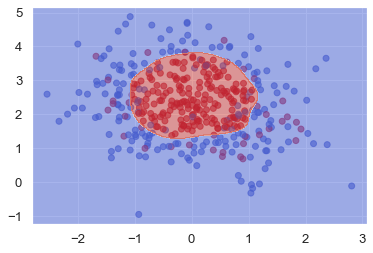

The score of SVM with gamma=3 and C=1 is:
0.8316831683168316


ValueError: With n_samples=0, test_size=0.25 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

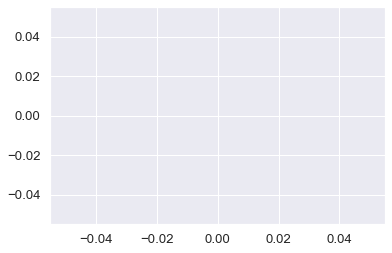

In [7]:
plot_SVM(gamma=3, C=1)